## Введение в анализ данных, ИАД-2

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №2

Задание выполнила: _Селиванова Валерия_

### Общая информация

__Дата выдачи:__ 04.03.2020

__Дедлайн:__ 23:59 17.03.2020

### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
\text{points} \times 10 / 16,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 16, а максимальное число дополнительных баллов, которые пойдут в бонус — 2 (в бонус идет только целое число баллов). Бонусные задания отмечены звездочками (*).

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-6: rd5CNrr

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

# kNN своими руками (5 баллов)

In [5]:
import numpy as np

### Реализуйте две функции расстояния (1 балл)
- Евклидова метрика
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(0.5 балла)}
$$
- метрика Манхэттена
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(0.5 балла)}
$$
Обе функции должны на вход получать матрицу `np.array of shape(n, m)` и вектор `np.array of shape(m, )`, а возвращать вектор расстояний от каждой строчки матрицы до вектора `np.array of shape(n, )`

**В данном пункте запрещено использование циклов for, while. Пользуйтесь возможностями numpy.** 

In [6]:
def euclidian_metric(X, x):
    distances = np.sqrt (np.sum ((X - x) ** 2, axis = 1))
    return distances

In [7]:
def manhattan_metric(X, x):
    distances = np.sum (np.abs (X - x), axis = 1)
    return distances

In [8]:
X = np.array([[1, 2, 3], [5, 6, 7], [8, 9, 10]])
y = np.ones(3)

In [9]:
assert np.allclose(euclidian_metric(X, y), np.array([ 2.23606798,  8.77496439, 13.92838828]))

In [10]:
assert np.allclose(manhattan_metric(X, y), np.array([ 3., 15., 24.]))

### Реализуйте алгоритм kNN для регрессии (4 балла)

Реализуйте взвешенный алгоритм kNN для регрессии. Пусть нам нужно вычислить значение $y$ для некоторого $x$ при известных данных $\left(x_1, y_1\right), \ldots, \left(x_\ell, y_\ell\right)$. Предсказанием вашего регрессора будет являться

$$
\hat{y} = \frac{\sum\limits_{i=1}^kw_iy_{(i)}}{\sum\limits_{i=1}^kw_i},
$$
где $\left(x_{(1)}, y_{(1)}\right), \ldots, \left(x_{(k)}, y_{(k)}\right)$ - ближайшие $k$ объектов к $x$ по некоторой метрике $d(\cdot, \cdot)$. Ваш алгоритм должен уметь работать с двумя метриками:

$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_2 = \sqrt{\sum\limits_{j=1}^n\left(x_{(i)}^j - x^j\right)^2}\qquad\text{(евклидова)}
$$
$$
d\left(x_{(i)}, x\right) = \|x_{(i)} - x\|_1 = \sum\limits_{j=1}^n\left|x_{(i)}^j - x^j\right|\qquad\text{(манхэттена)}
$$

- Реализуйте данный класс для равномерных весов (то есть $w_i = \frac{1}{k}$) (__3 балла__)
- Реализуйте возможность передать данному классу параметр `weights='distance'`, чтобы реализовывался взвешенный алгоритм kNN с весами, обратными расстояниям (то есть $w_i = \frac{1}{d\left(x, x_{(i)}\right)}$, где $d(x, y)$ - функция расстояния) (__1 балл__)

В данном классе должны быть реализованы методы `.fit` и `.predict`. Однако, для удобства может оказаться полезным реализовать еще некоторые вспомогательные методы, например, функции расстояния.

In [11]:
class KNN:
    def __init__(self, metric='euclid', k=5, weights='uniform'):
        """
        PARAMETERS:
        metric ('euclid' or 'manhattan')
        k - number of nearest neighbors
        """
        
        self.metric = metric
        self.k = k
        self.weights = weights
        
        if metric == 'euclid':
            self.eval = euclidian_metric
        else:
            self.eval = manhattan_metric
        
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (l, d)
        y_train - np.array of shape (l,)
        """
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        
        y_pred = []
        if self.weights == 'uniform':
            for obs in X_test:
                a = self.eval (self.X_train, obs)
                b = a <= np.sort (a)[self.k - 1]
                c = np.mean (y_train [b])
                y_pred.append (c)
        else:
            for obs in X_test:
                a = self.eval (self.X_train, obs)
                b = a <= np.sort (a)[self.k - 1]
                c = np.sum (y_train [b] * (1 / a[b])) / np.sum (1 / a[b])
                y_pred.append (c)
        y_pred = np.array (y_pred)
        
        return y_pred

#### Проверим, что наш knn и соответствующий knn из sklearn выдает одинаковые (ну, или почти одинаковые) результаты.

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [13]:
np.random.seed(17032019)
X_train = np.random.randn(1000, 50)
y_train = np.random.randn(1000,)
X_test = np.random.randn(500, 50)
y_test = np.random.randn(500,)

- Проверка для евклидовой метрики

In [14]:
knn = KNN(metric='euclid')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=2, weights='uniform')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

- Проверка для манхэттенской метрики

In [15]:
knn = KNN(metric='manhattan')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=1, weights='uniform')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

- Проверка для взвешенных весов

In [16]:
knn = KNN(metric='euclid', weights='distance')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=2, weights='distance')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

In [17]:
knn = KNN(metric='manhattan', weights='distance')
knn.fit(X_train, y_train)

sknn = KNeighborsRegressor(p=1, weights='distance')
sknn.fit(X_train, y_train)

assert np.allclose(knn.predict(X_test), sknn.predict(X_test))

# Линейная регрессия своими руками (5 баллов)

Реализуйте линейную регрессию с градиентным спуском для [функции потерь Хьюбера](https://en.wikipedia.org/wiki/Huber_loss):

$$
L_\delta\left(y, \hat{y}\right) =
\begin{cases}
\frac{1}{2}\left(y - \hat{y}\right)^2, \qquad &|y - \hat{y}| \leq \delta\\
\delta\left|y - \hat{y}\right| - \frac{1}{2}\delta^2,\qquad & \text{otherwise}
\end{cases}
$$

В таком случае общее значение функции потерь на всем датасете $(x_1, y_1), \ldots, (x_\ell, y_\ell)$ будет равно

$$
L = \frac{1}{\ell}\sum\limits_{i=1}^\ell L_\delta\left(y_i, \hat{y}_i\right)
$$

Чему будет равна производная данной функции по $\hat{y}$?

__Вспомните, что такое вектор $\hat{y}$? Как он зависит от $X$ и $w$?__

Проверьте работу вашего метода: выведите результаты его работы на той же искусственной выборке, что и в задаче выше (в качестве метрик качества используйте MSE и Huber loss). Постройте график зависимости значения функции потерь от итерации градиентного спуска.

*Вы можете опустить единичный признак в модели и не добавлять его в данные. Для данной искусственной выборки это не актуально, потому что целевая переменная в этом случае является случайной величиной из стандартного нормального распределения со средним 0.*

*Вектор весов в градиентном спуске можете инициализировать нулями.*

Эти ссылки могут показаться вам полезными:
- https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/lecture02-linregr.pdf
- https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
- https://stats.stackexchange.com/questions/312737/mean-absolute-error-mae-derivative

In [18]:
import matplotlib.pyplot as plt

%matplotlib inline

### Реализуйте функцию потерь Хьюбера для одного примера и ее градиент по весам (1 балл)

In [19]:
def huber_loss(x, y, w, delta):
    """
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    loss - scalar
    """
    if np.abs (y - np.dot (x, w)) <= delta:
        return 0.5 * (y - np.dot (x, w)) ** 2
    else:
        return delta * np.abs (y - np.dot (x, w)) - 0.5 * delta ** 2
    pass

def huber_grad(x, y, w, delta):
    """
    INPUT:
    x - np.array shape=(d,)
    y - scalar
    w - np.array shape=(d,)
    delta - scalar
    
    OUTPUT:
    grad - np.array shape=(d,)
    """
    if np.abs (y - np.dot (x, w)) <= delta:
        return -x * (y - np.dot (x, w))
    elif y - np.dot (x, w) > 0:
        return -delta * x
    else:
        return delta * x
    pass

Небольшие проверки для вашего удобства

In [20]:
x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 19
delta = 1

assert huber_loss(x, y, w, delta) == 29.5
assert np.allclose(huber_grad(x, y, w, delta), np.array([1, 2, 3]))

In [21]:
x = np.array([1, 2, 3])
w = np.array([3, 5, 12])
y = 49.2
delta = 1

assert np.allclose(huber_loss(x, y, w, delta), 0.02000000000000057)
assert np.allclose(huber_grad(x, y, w, delta), np.array([-0.2, -0.4, -0.6]))

Так будет выглядеть график нашей функции потерь. Можете (это не обязательное требование) проверить, что ваш результат будет выглядеть так же.

### А теперь уже и саму линейную регрессию (4 балла)

In [27]:
from numpy import linalg as LA
class LinearRegressionHuber:
    def __init__(self, delta=1.0, max_iter=1000, tol=1e-6, eta=1e-2):
        """
        PARAMETERS:
        delta - scalar in Huber loss
        max_iter - maximum possible number of iterations in Gradient Descent
        tol - precision for stopping criterion in Gradient Descent
        eta - step size in Gradient Descent (learning rate)
        """

        self.delta = delta
        self.max_iter = max_iter
        self.tol = tol
        self.eta = eta
        
        self.w = None
        self.loss_history = None
        
    def fit(self, X, y):
        """
        INPUT:
        X_train - np.array of shape (n, d)
        y_train - np.array of shape (n,)
        
        В этой функции вы должны инициализировать веса (можно нулями), а также 
        итерационно обновлять веса с помощью 
        градиентного спуска (считать и запоминать лосс (значение функции потерь) будет хорошим решением)
        """

        self.X_train = X
        self.y_train = y
        self.w = np.zeros (self.X_train.shape [1])
        self.loss_history = []
        
        while len (self.loss_history) < self.max_iter:
            self.w -= self.eta * self.calc_gradient (self.X_train, self.y_train)
            self.loss_history.append (self.calc_loss (self.X_train, self.y_train))
            if LA.norm (self.eta * self.calc_gradient (self.X_train, self.y_train)) < self.tol:
                break
        self.loss_history = np.array (self.loss_history)
        return self.loss_history
        
    def predict(self, X):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        
        Предскажите ответы с помощью обученных весов
        """
        
        y_pred = np.dot (X, self.w)
        return y_pred
    
    def calc_gradient(self, X, y):
        """
        Calculates the gradient of Huber loss by weights.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        grad - np.array of shape (d,)
        
        Посчитайте градиент как среднее от градиентов для каждого примера
        """

        grad = np.zeros_like (self.w)
        a = [huber_grad (obs, ans, self.w, self.delta) for obs, ans in zip (self.X_train, self.y_train)]
        grad = np.mean (a, axis = 0)
        
        return grad 
    
    def calc_loss(self, X, y):
        """
        Calculates the Huber loss.
        
        INPUT:
        X - np.array of shape (l, d)
        y - np.array of shape (l,)
        
        OUTPUT:
        loss - float
        
        Посчитайте loss по выборке как среднее loss'ов для каждого 
        примера
        """

        loss = 0
        b = [huber_loss (obs, ans, self.w, self.delta) for obs, ans in zip (X, y)]
        loss = np.mean (b)
        return loss

In [28]:
lr = LinearRegressionHuber()

In [29]:
loss_history = lr.fit (X_train, y_train)

Постройте график зависимости функции потерь от итерации

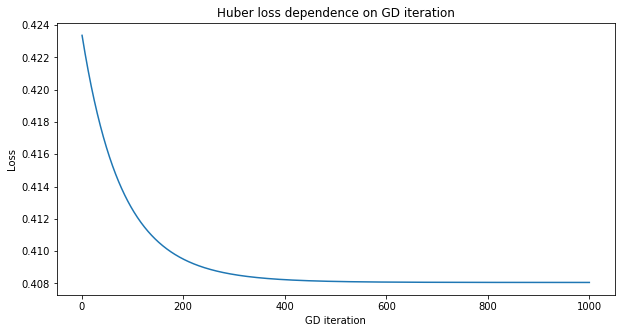

In [30]:
fig, ax = plt.subplots (1, figsize = (10, 5))
ax.plot (np.arange (1, 1001), loss_history)
ax.set (title = 'Huber loss dependence on GD iteration', xlabel = 'GD iteration', ylabel = 'Loss')
plt.show ()

# Практика (7 баллов)

Пожалуйста, при использовании различных функций из библиотек импортируйте все, что вам понадобилось в данной части, в следующем блоке:

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

%matplotlib inline

В этом домашнем задании вы поработаете с данными из другого соревнования на Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques. Задача - предсказание цены дома.

In [32]:
data = pd.read_csv('train.csv', header=0)

In [33]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [34]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
data.drop('Id', axis=1, inplace=True)

## 1 (1 балл)

Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете? Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. **Проверьте, что вы действительно избавились от пропусков.**

*Напоминание. В зависимости от типа столбца, можно заполнить пропуски, например, средним арифметическим, медианой, модой, можно какими-то отдельными значениями. А можно такие столбцы вообще удалить.*

In [36]:
a = data.isnull().any().values
for i in data.columns [a]:
    print (i, np.sum (data [i].isnull()))

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


- LotFrontage: вещественный признак, поэтому пропуски в этом столбце логично заполнить его средним значением.
- Alley: предположим, что у некоторых домов может не быть дорожки к дому - заполним,используя 'Absent'.
- MasVnrType: тип кирпичной облицовки - заполним наиболее часто встречающимся значением 'None'.
- MasVnrArea: вещественный признак - заполним средним.
- BsmtQual: порядковый - заполним наиболее часто встречающимся значением 'TA'.
- BsmtCond: порядковый - заполним наиболее часто встречающимся значением 'TA'.
- BsmtExposure: порядковый - заполним наиболее часто встречающимся 'No'.
- BsmtFinType1: порядковый - заполним наиболее часто встречающимся 'Unf'.
- BsmtFinType2: можно удалить из-за схожести с предыдущим признаком.
- Electrical: категориальный - заполним наиболее часто встречающимся 'SBrkr'.
- FireplaceQu: значение пропущено, если камина в доме нет - заполним, используя 'Absent'.
- GarageType: значение пропущено, если гаража в доме нет - заполним, используя 'Absent'.
- GarageYrBlt, GarageFinish, GarageQual, GarageCond: так же отвечают за наличие гаража - заполним пропуски, используя 'Absent'.
- Pool: значение пропущено, если бассейна в доме нет - заполним, используя 'Absent'.
- Fence: значение пропущено, если ограды в доме нет - заполним, используя 'Absent'.
- MiscFeature: можно удалить, т. к. пропусков очень много и нет какой-то системы в значениях.

In [37]:
data.drop (['BsmtFinType2', 'MiscFeature'], axis = 1, inplace = True)

data.loc [data ['LotFrontage'].isnull(), 'LotFrontage'] = np.mean (data ['LotFrontage'])
data.loc [data ['Alley'].isnull(), 'Alley'] = 'Absent'
data.loc [data ['MasVnrType'].isnull(), 'MasVnrType'] = 'None'
data.loc [data ['MasVnrArea'].isnull(), 'MasVnrArea'] = np.mean (data ['MasVnrArea'])
data.loc [data ['BsmtQual'].isnull(), 'BsmtQual'] = 'TA'
data.loc [data ['BsmtCond'].isnull(), 'BsmtCond'] = 'TA'
data.loc [data ['BsmtExposure'].isnull(), 'BsmtExposure'] = 'No'
data.loc [data ['BsmtFinType1'].isnull(), 'BsmtFinType1'] = 'Unf'
data.loc [data ['Electrical'].isnull(), 'Electrical'] = 'SBrkr'
data.loc [data ['FireplaceQu'].isnull(), 'FireplaceQu'] = 'Absent'
data.loc [data ['GarageType'].isnull(), 'GarageType'] = 'Absent'
data.loc [data ['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 'Absent'
data.loc [data ['GarageFinish'].isnull(), 'GarageFinish'] = 'Absent'
data.loc [data ['GarageQual'].isnull(), 'GarageQual'] = 'Absent'
data.loc [data ['GarageCond'].isnull(), 'GarageCond'] = 'Absent'
data.loc [data ['PoolQC'].isnull(), 'PoolQC'] = 'Absent'
data.loc [data ['Fence'].isnull(), 'Fence'] = 'Absent'

In [38]:
data.isnull().any().any()

False

Пропусков в данных больше нет.

## 2 (0.5 балла)

Обработайте категориальные признаки. В их обнаружении вам может помочь синтаксис `pandas` (например, можно обратить внимание на типы столбцов), а также описание датасета и его исследование.

In [39]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 78, dtype: object

Все признаки, отвечающие за качество, являются порядковыми, поэтому для них можно применить Label encoding. Для категориальных признаков можно применить One-Hot кодирование.

In [40]:
data['ExterQual'] = data['ExterQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No':0})
data['BsmtQual'] = data['BsmtQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No':0})
data['BsmtExposure'] = data['BsmtExposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'No':0})
data['BsmtFinType1'] = data['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No':0})
data['HeatingQC'] = data['HeatingQC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No':0})
data['KitchenQual'] = data['KitchenQual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No':0})
data['GarageFinish'] = data['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1,'No':0})
data['FireplaceQu'] = data['FireplaceQu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No':0})
label_encoded = ['ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu']

In [41]:
oh = data.iloc [:]
for i in oh.columns [oh.dtypes.values == 'O']:
    onehot = pd.get_dummies (oh [i], drop_first = True, prefix = i)
    oh = pd.concat ([oh, onehot], axis = 1)
oh.drop (list (oh.columns [oh.dtypes.values == 'O']), axis = 1, inplace = True)

In [42]:
oh.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,4,4,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,3,4,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,4,4,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,4,4,...,0,0,0,0,1,0,0,0,1,0


## 3 (0.5 балла)

Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

*Для визуализации можно использовать `seaborn.heatmap()`.*

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Сначала надо выкинуть one-hot признаки.

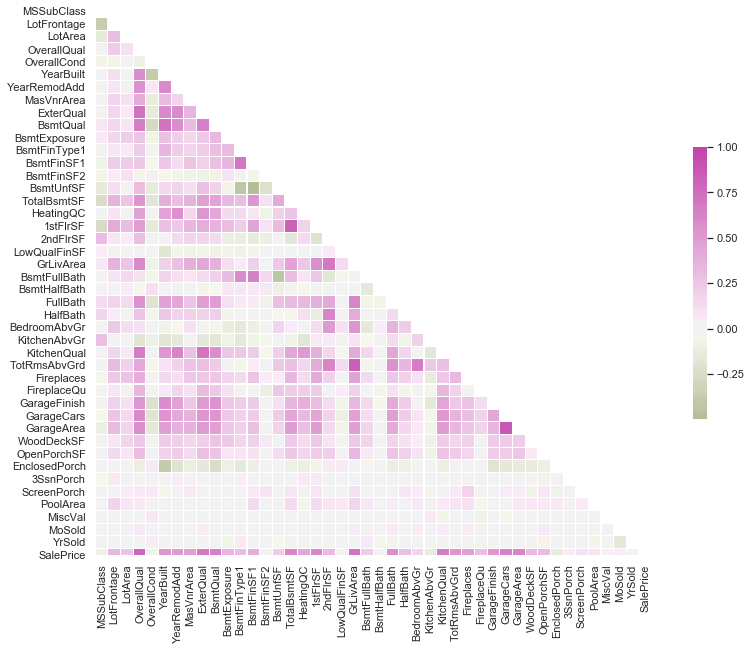

In [44]:
df = np.any ([oh.dtypes.values == 'float64', oh.dtypes.values == 'int64'], axis = 0)
df = oh.columns [df]

c = oh [df].corr()
e = np.triu (np.ones_like(c, dtype = np.bool))
sns.set (style = 'whitegrid')
fig, ax = plt.subplots (figsize = (15, 10))
f = sns.diverging_palette (100, 5000, as_cmap = True)
sns.heatmap (c, mask = e, cmap = f, vmax = 1, center = 0, square = True, linewidths = .1, cbar_kws = {"shrink" : .5})
plt.show ()

На графике видно, что между многими признаками есть сильная корреляция. Следовательно, может возникнуть проблема мультиколлинеарности.

## 5 (0.5 балла)

Найдите признаки с максимальным и минимальным **абсолютным** значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

*Не забудьте указать название графика и обозначить, что изображено по каждой из осей.*

In [45]:
c ['SalePrice'].abs ().sort_values (ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
BsmtQual         0.650138
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
GarageFinish     0.513105
YearRemodAdd     0.507101
MasVnrArea       0.475241
Fireplaces       0.466929
HeatingQC        0.427649
BsmtFinSF1       0.386420
BsmtExposure     0.355147
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtFinType1     0.298771
FireplaceQu      0.295794
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch   

Максимальным значением корреляции с предсказываемым значением обладает признак 'OverallQual' (0.79). Минимальным - признак 'BsmtFinSF2' (0.01).

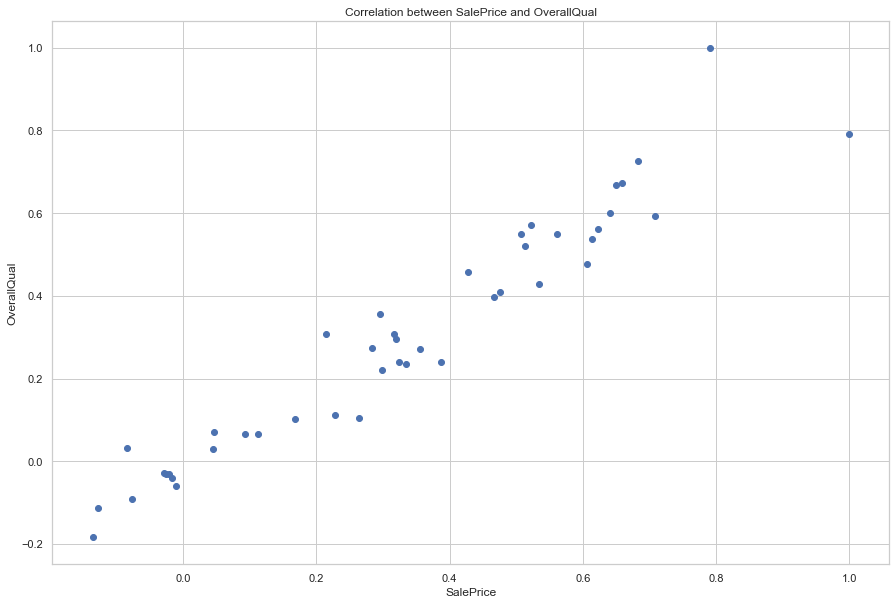

In [46]:
plt.figure (figsize = (15, 10))
plt.title ('Correlation between SalePrice and OverallQual')
plt.scatter (c ['SalePrice'], c ['OverallQual'])
plt.xlabel ('SalePrice')
plt.ylabel ('OverallQual')
plt.show ()

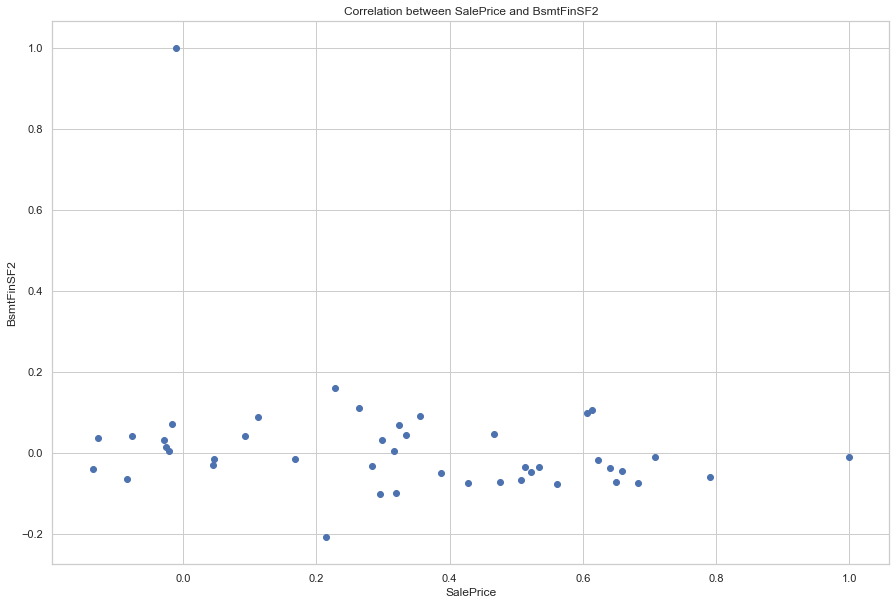

In [47]:
plt.figure (figsize = (15, 10))
plt.title ('Correlation between SalePrice and BsmtFinSF2')
plt.scatter (c ['SalePrice'], c ['BsmtFinSF2'])
plt.xlabel ('SalePrice')
plt.ylabel ('BsmtFinSF2')
plt.show ()

## 6 (0.5 балла)

Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также «смещения» распределения переменной в сторону нормального (что бывает полезно при статистическом анализе), можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). В данном случае воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

*В дальнейшем используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.*

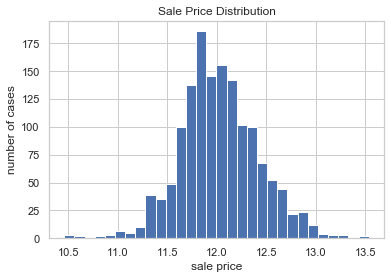

In [48]:
plt.figure
plt.title ('Sale Price Distribution')
plt.hist (np.log1p (data ['SalePrice']), bins = 30)
plt.xlabel ('sale price')
plt.ylabel ('number of cases')
plt.show ()

Перейдем непосредственно к построению моделей. Разобьем выборку на обучение и контроль.

*Пожалуйста, **не меняйте** значение `random_state` в следующей ячейке.*

In [69]:
X_train, X_val, y_train, y_val = train_test_split(data.drop('SalePrice', axis=1),
                                                  np.log1p(data['SalePrice']), random_state=17032019)

In [70]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1095, 77), (365, 77), (1095,), (365,))

## 7 (2 балла)

Примените к данным следующие алгоритмы:

- kNN
- линейная регрессия
- Lasso
- Ridge

(Если вдруг забыли что такое Lasso и Ridge - https://habr.com/ru/post/328760/)

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрике **Root** Mean Squared Error. Какой из методов показывает себя лучше?

## 8 (0.5 балла)

Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения. В чем различия между полученными наборами весов и почему?

In [ ]:
# your code here

## 9 (0.5 балла)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.125 на тестовых данных по метрике RMSE (если вы дошли до этого задания, а качество выше уже удовлетворяет этому условию, вы автоматически получите за него полный балл).

In [ ]:
# your code here

## 10* (1 балл)

Добейтесь того, чтобы в заданиях выше ваш лучший алгоритм давал качество не больше 0.121 на тестовых данных по метрике RMSE. Для этого вы можете использовать самые разные методы, какие захотите - отбор признаков, генерация новых, разные способы предобработки данных. Единственное ограничение - не использовать никакие алгоритмы регрессии, кроме kNN, линейной регрессии, Lasso и Ridge.

In [ ]:
# your code here

# Теория (бонусная часть)

За данную часть можно получить бонусные баллы. Решения необходимо оформить в этом же файле в ячейках типа Markdown, пользуясь $\LaTeX$ для записи математических формул.

## 1* (0.5)

Вычислите производную сигмоидной функции

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

и выразите ее через $\sigma(x)$.

*(your solution here)*

## 2* (0.5)

Найдите константу $C$, решающую следующую задачу ($0 < \tau < 1$ фиксировано):

$$
\sum\limits_{i=1}^\ell\rho_\tau\left(y_i - C\right) \to \min_C,
$$

где

$$
\rho_\tau(z) =
\begin{cases}
\tau z, & z > 0\\
(\tau - 1)z, & z \leq 0
\end{cases}
$$

Вам может показаться полезной эта ссылка https://medium.com/@gennadylaptev/median-and-mae-3e85f92df2d7

*(your solution here)*